In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
%matplotlib inline

import matplotlib as mpl
from tqdm import tqdm

#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.1
mpl.rcParams['figure.figsize'] = [6.0, 3.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

import splat
import splat.simulate as spsim
import wisps.simulations as wispsim

In [34]:
import bisect
class Pointing(object):
    def __init__(self, **kwargs):
        #only a function of coordinate
        self.coord=kwargs.get('coord', None)
    
    def cdf(self, dmax, dnorm=10000):
        """
        Returns a CDF distribution of distances normalized at 10kpc from the sun
        input: 
              dmax= max distance to simulate up to
              dnorm=distance where CDF=1, normalization distance
        output: distance steps and asscoiated cdf values
        """
        norm=dmax**3*spsim.volumeCorrection(self.coord, 10**4, dmin=1.0, model='juric', center='sun', nsamp=10, unit=u.pc)
        dds=np.linspace(0, dmax, 100)
        return dds, [x**3*spsim.volumeCorrection(self.coord, x, dmin=1.0, model='juric', center='sun', nsamp=10, unit=u.pc)/norm for x in dds]
    
    def random_draw(self, nsample=10, dnorm=10000):
        """
        random number from the CDF
        optional input: nsample, the number of points to return 
        """
        dvals, cdf_vals=self.cdf(10000, dnorm=dnorm)
        x = np.random.rand( nsample)
        idx = [bisect.bisect(cdf_vals, i) for i in x]
        return dvals[idx]

In [36]:
#without wrapping this in an object
def cdf(coord, dmax, dnorm=10000):
        """
        Returns a CDF distribution of distances normalized at 10kpc from the sun
        input: 
              dmax= max distance to simulate up to
              dnorm=distance where CDF=1, normalization distance
        output: distance steps and asscoiated cdf values
        """
        norm=dmax**3*spsim.volumeCorrection(coord, 10**4, dmin=1.0, model='juric', center='sun', nsamp=10, unit=u.pc)
        dds=np.linspace(0, dmax, 1000)
        return dds, [x**3*spsim.volumeCorrection(coord, x, dmin=1.0, model='juric', center='sun', nsamp=10, unit=u.pc)/norm for x in dds]
    
def random_draw(coord, nsample=10, dnorm=10000):
        """
        random number from the CDF
        optional input: nsample, the number of points to return 
        """
        dvals, cdf_vals=cdf(coord, dnorm, dnorm=dnorm)
        x = np.random.rand( nsample)
        idx = [bisect.bisect(cdf_vals, i) for i in x]
        return dvals[idx]

In [3]:
l=2*np.pi*(np.random.uniform(0,1, 500))
b=np.arccos(2*np.random.uniform(0,1, 500)-1)-np.pi/2

In [4]:
#plt.hist(b)

In [5]:
coords=SkyCoord(l=l*u.radian, b=b*u.radian, frame='galactic')

In [6]:
ptngs=[Pointing(coord=c) for c in coords]

In [7]:
ds=np.array([pi.random_draw(nsample=10**5, dnorm=10**5) for pi in tqdm(ptngs)])

100%|██████████| 500/500 [01:41<00:00,  4.92it/s]


In [8]:
ls=np.array([l for x in ds.T]).T
bs=np.array([b for x in ds.T]).T

In [9]:
coords2=[]
for li, bi, di in zip(ls, bs, ds):
    coords2.append(SkyCoord(l=li*u.radian, b=bi*u.radian, distance=di*u.pc,  frame='galactic'))

In [10]:
coords3=SkyCoord(coords2)

Text(0.5, 0, 'Z')

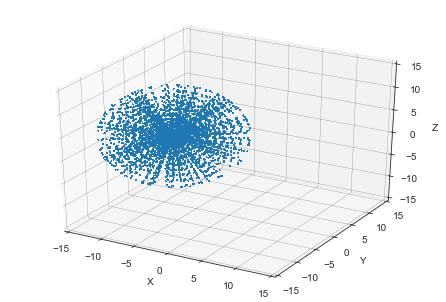

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
fig = plt.figure()

ax = Axes3D(fig)


ax.scatter(coords3.galactocentric.cartesian.x/1000, coords3.galactocentric.cartesian.y/1000, 
           coords3.galactocentric.cartesian.z/1000, marker='+',
           alpha=0.1, s=2)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_zlim([-15, 15])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


In [12]:
distances=(coords3.cartesian.x.value**2+coords3.cartesian.y.value**2+coords3.cartesian.z.value**2)**0.5

In [13]:
r=(coords3.cartesian.x.value**2+coords3.cartesian.y.value**2)**0.5

In [14]:
import seaborn as sns

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

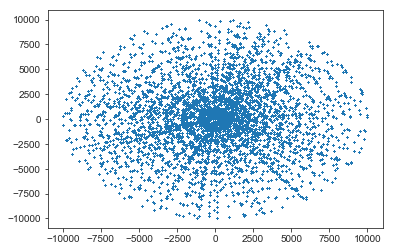

In [21]:
plt.scatter(coords3.cartesian.x.value, coords3.cartesian.y.value, marker='.', s=0.1, alpha=0.1)
#\ax = sns.kdeplot(np.log10(r), coords3.cartesian.z.value/1000.0, shade=True)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)

In [16]:
x,y=ptngs[0].cdf(10000)
dydx = np.gradient(y, 10)

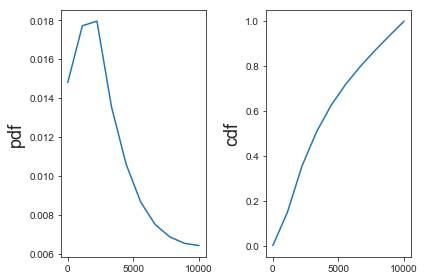

In [17]:
fig, ax=plt.subplots(ncols=2)
#plt.plot(x, y)
ax[0].plot(x, dydx)
ax[1].plot(x, y)

ax[0].set_ylabel('pdf', fontsize=18)
ax[1].set_ylabel('cdf', fontsize=18)

plt.tight_layout()

In [22]:
print('hello')

hello


(array([113., 194., 141., 124.,  95.,  67.,  74.,  56.,  70.,  66.]),
 array([  70.07007007, 1059.05905906, 2048.04804805, 3037.03703704,
        4026.02602603, 5015.01501502, 6004.004004  , 6992.99299299,
        7981.98198198, 8970.97097097, 9959.95995996]),
 <a list of 10 Patch objects>)

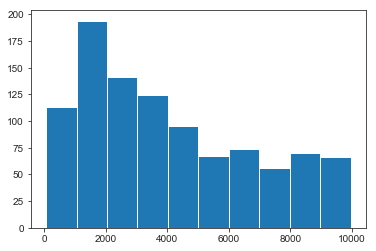

In [37]:
plt.hist(random_draw(coords[0], nsample=1000, dnorm=10000))